# Spike & Peak Analysis EDA

## IMPORTS & CONFIGURATION

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## LOAD DATA

In [3]:

df = pd.read_csv("C:/Users/lekshmi/Desktop/ml projects/appliances energy prediction/KAG_energydata_complete.csv")

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

print(f"Dataset loaded: {df.shape[0]:,} records")

Dataset loaded: 19,735 records


## PEAK VALUE ANALYSIS


SECTION 1: PEAK VALUE ANALYSIS

📊 Peak Distribution by Energy Level:
  Appliances_Range  Count  Percentage
0         [0, 150)  17293       87.63
1       [150, 300)   1238        6.27
2       [300, 450)    795        4.03
3       [450, 600)    239        1.21
4       [600, 750)    132        0.67
5       [750, 900)     34        0.17
6      [900, 1050)      2        0.01


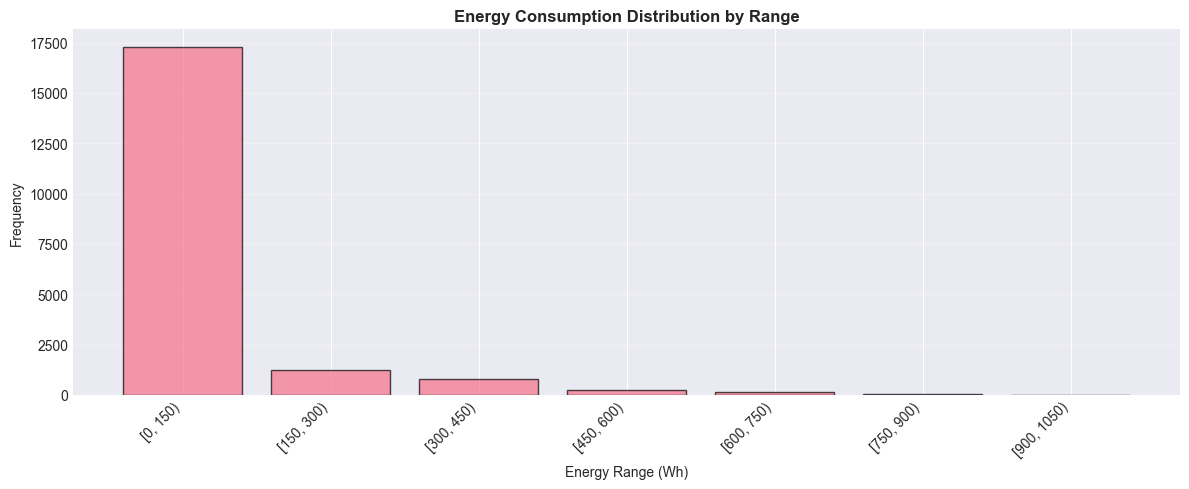


✅ Key Insight: Distribution shows strong right-skew with majority in low ranges


In [4]:

print("\n" + "=" * 80)
print("SECTION 1: PEAK VALUE ANALYSIS")
print("=" * 80)

# Define peak ranges
print("\n📊 Peak Distribution by Energy Level:")

max_val = df['Appliances'].max()
bins = np.arange(0, max_val + 10, 150)

appliance_dist = (
    pd.cut(df['Appliances'], bins=bins, right=False)
    .value_counts()
    .sort_index()
    .reset_index()
)
appliance_dist.columns = ['Appliances_Range', 'Count']
appliance_dist['Percentage'] = (appliance_dist['Count'] / len(df) * 100).round(2)

print(appliance_dist)

# Visualization
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(range(len(appliance_dist)), appliance_dist['Count'], edgecolor='black', alpha=0.7)
ax.set_xlabel('Energy Range (Wh)')
ax.set_ylabel('Frequency')
ax.set_title('Energy Consumption Distribution by Range', fontsize=12, fontweight='bold')
ax.set_xticks(range(len(appliance_dist)))
ax.set_xticklabels(appliance_dist['Appliances_Range'].astype(str), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Key Insight: Distribution shows strong right-skew with majority in low ranges")


## HIGH-VALUE EVENTS (≥800 Wh)


SECTION 2: HIGH-VALUE EVENTS (≥800 Wh)

📊 High-Value Events Statistics:
   Total occurrences: 17
   Percentage of data: 0.09%
   Mean value: 874.71 Wh
   Median value: 850.00 Wh
   Max value: 1080.00 Wh

🌞 High-Value Events by Day of Week:
         Day  Count  Percentage
0     Monday      2       11.76
1    Tuesday      0        0.00
2  Wednesday      1        5.88
3   Thursday      5       29.41
4     Friday      2       11.76
5   Saturday      4       23.53
6     Sunday      3       17.65


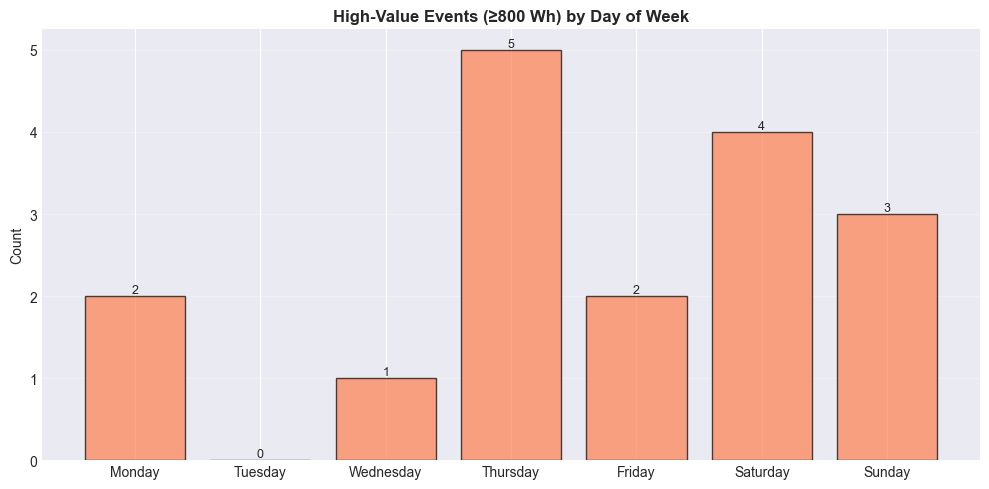

In [5]:
print("\n" + "=" * 80)
print("SECTION 2: HIGH-VALUE EVENTS (≥800 Wh)")
print("=" * 80)

df_high = df[df['Appliances'] >= 800].copy()

print(f"\n📊 High-Value Events Statistics:")
print(f"   Total occurrences: {len(df_high):,}")
print(f"   Percentage of data: {len(df_high)/len(df)*100:.2f}%")
print(f"   Mean value: {df_high['Appliances'].mean():.2f} Wh")
print(f"   Median value: {df_high['Appliances'].median():.2f} Wh")
print(f"   Max value: {df_high['Appliances'].max():.2f} Wh")

# Day-wise distribution
df_high['Day'] = df_high.index.day_name()

day_distribution = (
    df_high['Day']
    .value_counts()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
             'Friday', 'Saturday', 'Sunday'],
            fill_value=0)
    .reset_index()
)
day_distribution.columns = ['Day', 'Count']
day_distribution['Percentage'] = (day_distribution['Count'] / len(df_high) * 100).round(2)

print("\n🌞 High-Value Events by Day of Week:")
print(day_distribution)

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(day_distribution['Day'], day_distribution['Count'], 
              color='coral', edgecolor='black', alpha=0.7)
ax.set_ylabel('Count')
ax.set_title('High-Value Events (≥800 Wh) by Day of Week', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


## HIGH-VALUE EVENTS BY HOUR


SECTION 3: HIGH-VALUE EVENTS BY HOUR

⏰ High-Value Events by Hour of Day:
   Hour  Count  Percentage
0     8      2       11.76
1     9      1        5.88
2    10      3       17.65
3    15      1        5.88
4    16      2       11.76
5    17      3       17.65
6    18      3       17.65
7    19      2       11.76


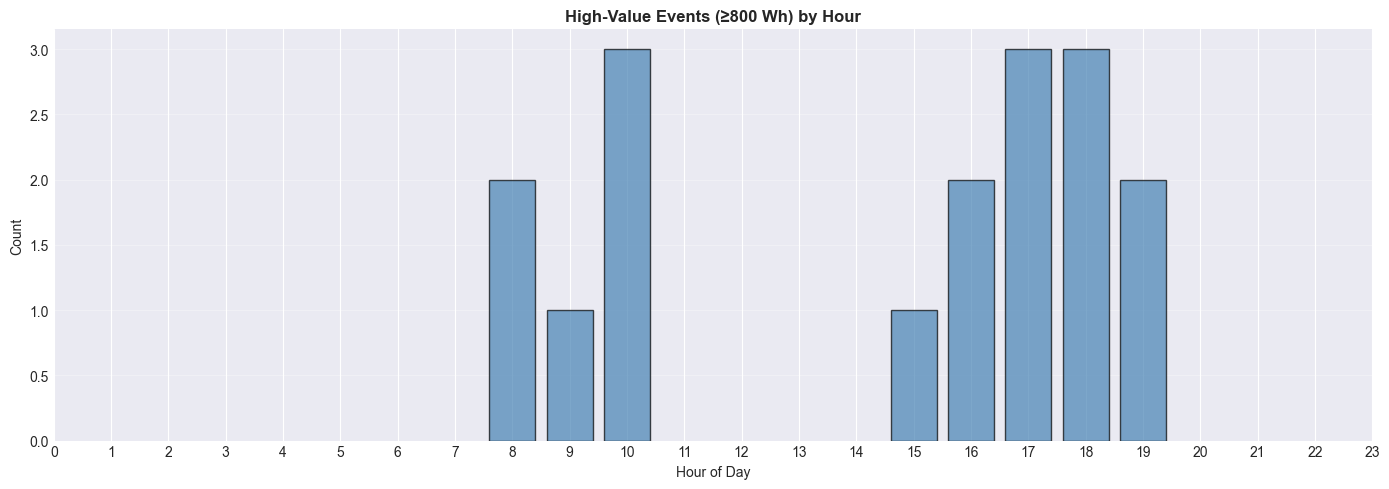


🔥 Peak Hour: 10:00 (3 events)


In [6]:

print("\n" + "=" * 80)
print("SECTION 3: HIGH-VALUE EVENTS BY HOUR")
print("=" * 80)

df_high['Hour'] = df_high.index.hour

hour_distribution = (
    df_high['Hour']
    .value_counts()
    .sort_index()
    .reset_index()
)
hour_distribution.columns = ['Hour', 'Count']
hour_distribution['Percentage'] = (hour_distribution['Count'] / len(df_high) * 100).round(2)

print("\n⏰ High-Value Events by Hour of Day:")
print(hour_distribution)

# Visualization
fig, ax = plt.subplots(figsize=(14, 5))
bars = ax.bar(hour_distribution['Hour'], hour_distribution['Count'], 
              color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Count')
ax.set_title('High-Value Events (≥800 Wh) by Hour', fontsize=12, fontweight='bold')
ax.set_xticks(range(0, 24))
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

peak_hour = hour_distribution.loc[hour_distribution['Count'].idxmax()]
print(f"\n🔥 Peak Hour: {int(peak_hour['Hour'])}:00 ({int(peak_hour['Count'])} events)")


## DAY-HOUR HEATMAP FOR HIGH-VALUE EVENTS


SECTION 4: DAY-HOUR HEATMAP FOR HIGH-VALUE EVENTS

🔥 High-Value Events: Day × Hour Heatmap
Hour        8    9    10   15   16   17   18   19
Day                                              
Monday     0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0
Wednesday  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
Thursday   0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0
Friday     0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0
Saturday   0.0  0.0  2.0  0.0  1.0  0.0  1.0  0.0
Sunday     2.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0


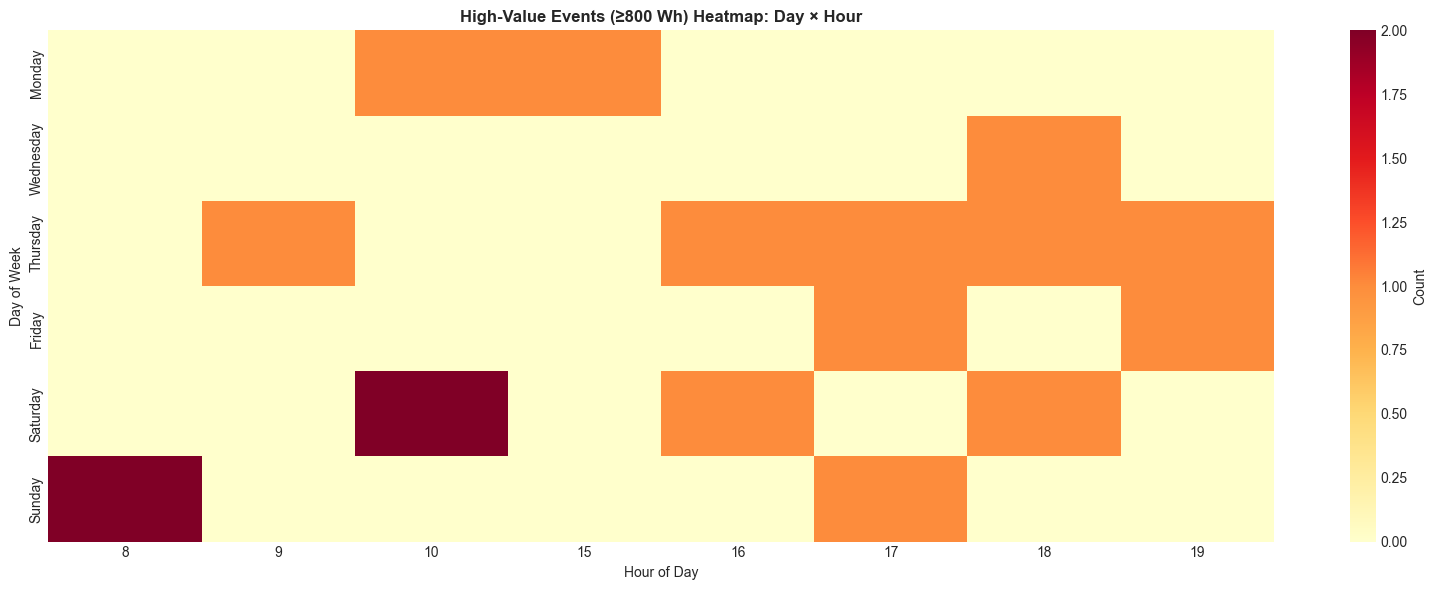

In [7]:

print("\n" + "=" * 80)
print("SECTION 4: DAY-HOUR HEATMAP FOR HIGH-VALUE EVENTS")
print("=" * 80)

df_high = df[df['Appliances'] >= 800].copy()
df_high['Day'] = df_high.index.day_name()
df_high['Hour'] = df_high.index.hour

day_hour_distribution = (
    df_high
    .groupby(['Day', 'Hour'])
    .agg(
        Count=('Appliances', 'size'),
        Avg_Appliances=('Appliances', 'mean')
    )
    .reset_index()
)

# Order days
day_order = ['Monday','Tuesday','Wednesday','Thursday',
             'Friday','Saturday','Sunday']
day_hour_distribution['Day'] = pd.Categorical(
    day_hour_distribution['Day'],
    categories=day_order,
    ordered=True
)
day_hour_distribution = day_hour_distribution.sort_values(['Day', 'Hour'])

# Pivot for heatmap
heatmap_data = day_hour_distribution.pivot(index='Day', columns='Hour', values='Count').fillna(0)

print("\n🔥 High-Value Events: Day × Hour Heatmap")
print(heatmap_data)

# Visualization
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Count'}, ax=ax, annot=False)
ax.set_title('High-Value Events (≥800 Wh) Heatmap: Day × Hour', fontsize=12, fontweight='bold')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day of Week')
plt.tight_layout()
plt.show()


## MID-RANGE EVENTS (600-900 Wh)

In [8]:
print("\n" + "=" * 80)
print("SECTION 5: MID-RANGE EVENTS (600–900 Wh)")
print("=" * 80)

df_mid = df[(df['Appliances'] >= 600) & (df['Appliances'] <= 900)].copy()
df_mid['Day'] = df_mid.index.day_name()

day_value_distribution = (
    df_mid
    .groupby('Day')
    .agg(
        Count=('Appliances', 'size'),
        Avg_Appliances=('Appliances', 'mean'),
        Min_Appliances=('Appliances', 'min'),
        Max_Appliances=('Appliances', 'max')
    )
    .reset_index()
)

day_order = ['Monday','Tuesday','Wednesday','Thursday',
             'Friday','Saturday','Sunday']
day_value_distribution['Day'] = pd.Categorical(
    day_value_distribution['Day'],
    categories=day_order,
    ordered=True
)
day_value_distribution = day_value_distribution.sort_values('Day')

print("\n📊 Mid-Range Events by Day of Week:")
print(day_value_distribution)


SECTION 5: MID-RANGE EVENTS (600–900 Wh)

📊 Mid-Range Events by Day of Week:
         Day  Count  Avg_Appliances  Min_Appliances  Max_Appliances
1     Monday     42      683.095238             600             900
5    Tuesday     16      676.875000             600             770
6  Wednesday     10      691.000000             600             830
4   Thursday     22      702.272727             600             890
0     Friday     37      676.216216             600             880
2   Saturday     26      681.153846             600             840
3     Sunday     14      703.571429             620             850


## DAY-HOUR BINS FOR APPLIANCE DISTRIBUTION

In [9]:

print("\n" + "=" * 80)
print("SECTION 6: APPLIANCE DISTRIBUTION BY DAY-HOUR BINS")
print("=" * 80)

df['Day'] = df.index.day_name()
df['Hour'] = df.index.hour

max_val = int(df['Appliances'].max())
bins = np.arange(0, max_val + 100, 150)

df['Appliance_Bin'] = pd.cut(
    df['Appliances'],
    bins=bins,
    right=False
)

# Day-Bin distribution
day_bin_distribution = (
    df
    .groupby(['Day', 'Appliance_Bin'])
    .size()
    .unstack(fill_value=0)
)

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_bin_distribution = day_bin_distribution.reindex(day_order)

print("\n📋 Energy Range Distribution by Day:")
print(day_bin_distribution)

# Hour-Bin distribution
hour_bin_distribution = (
    df
    .groupby(['Hour', 'Appliance_Bin'])
    .size()
    .unstack(fill_value=0)
)

hour_bin_distribution = hour_bin_distribution.reindex(range(24), fill_value=0)

print("\n📋 Energy Range Distribution by Hour:")
print(hour_bin_distribution)



SECTION 6: APPLIANCE DISTRIBUTION BY DAY-HOUR BINS

📋 Energy Range Distribution by Day:
Appliance_Bin  [0, 150)  [150, 300)  [300, 450)  [450, 600)  [600, 750)  \
Day                                                                       
Monday             2314         215         159          48          36   
Tuesday            2599         146          83          36          12   
Wednesday          2605         150         100          15           7   
Thursday           2591         154          80          31          16   
Friday             2393         223         150          42          31   
Saturday           2343         194         130          42          20   
Sunday             2448         156          93          25          10   

Appliance_Bin  [750, 900)  [900, 1050)  
Day                                     
Monday                  5            1  
Tuesday                 4            0  
Wednesday               3            0  
Thursday                6     

## MONTH-LEVEL PEAK ANALYSIS

In [10]:
print("\n" + "=" * 80)
print("SECTION 7: MONTH-LEVEL PEAK ANALYSIS")
print("=" * 80)

df['Month'] = df.index.month_name()

max_val = int(df['Appliances'].max())
bins = np.arange(0, max_val + 100, 300)

df['Appliance_Bin'] = pd.cut(
    df['Appliances'],
    bins=bins,
    right=False
)

month_bin_distribution = (
    df
    .groupby(['Month', 'Appliance_Bin'])
    .size()
    .unstack(fill_value=0)
)

month_order = ['January','February','March','April','May']
month_bin_distribution = month_bin_distribution.reindex(month_order)

print("\n📊 Energy Range Distribution by Month:")
print(month_bin_distribution)


SECTION 7: MONTH-LEVEL PEAK ANALYSIS

📊 Energy Range Distribution by Month:
Appliance_Bin  [0, 300)  [300, 600)  [600, 900)
Month                                          
January            2670         216          33
February           3899         244          33
March              4214         215          35
April              4058         217          44
May                3690         142          21


## WEEK-OF-MONTH ANALYSIS

In [11]:

print("\n" + "=" * 80)
print("SECTION 8: WEEK-OF-MONTH ANALYSIS")
print("=" * 80)

df['Week_of_Month'] = ((df.index.day - 1) // 7 + 1)

max_val = int(df['Appliances'].max())
bins = np.arange(0, max_val + 100, 150)
df['Appliance_Bin'] = pd.cut(df['Appliances'], bins=bins, right=False)

week_of_month_distribution = (
    df
    .groupby(['Week_of_Month', 'Appliance_Bin'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

print("\n📊 Energy Range Distribution by Week of Month:")
print(week_of_month_distribution)



SECTION 8: WEEK-OF-MONTH ANALYSIS

📊 Energy Range Distribution by Week of Month:
Appliance_Bin  [0, 150)  [150, 300)  [300, 450)  [450, 600)  [600, 750)  \
Week_of_Month                                                             
1                  3554         254         151          42          26   
2                  3941         284         184          58          30   
3                  4379         321         226          73          29   
4                  4308         296         172          47          29   
5                  1111          83          62          19          18   

Appliance_Bin  [750, 900)  [900, 1050)  
Week_of_Month                           
1                       4            1  
2                       8            1  
3                      10            0  
4                       9            0  
5                       3            0  


## DAY-HOUR-WEEK INTERACTION

In [12]:

print("\n" + "=" * 80)
print("SECTION 9: MULTI-DIMENSIONAL ANALYSIS: WEEK × DAY × HOUR")
print("=" * 80)

df['Day'] = df.index.day_name()
df['Week_of_Month'] = ((df.index.day - 1) // 7 + 1)

max_val = int(df['Appliances'].max())
bins = np.arange(0, max_val + 100, 150)
df['Appliance_Bin'] = pd.cut(df['Appliances'], bins=bins, right=False)

day_week_distribution = (
    df
    .groupby(['Week_of_Month', 'Day', 'Appliance_Bin'])
    .size()
    .unstack(fill_value=0)
)

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_week_distribution = day_week_distribution.reindex(day_order, level=1)

print("\n📊 Energy Distribution: Week × Day × Energy Range (sample):")
print(day_week_distribution.head(10))



SECTION 9: MULTI-DIMENSIONAL ANALYSIS: WEEK × DAY × HOUR

📊 Energy Distribution: Week × Day × Energy Range (sample):
Appliance_Bin            [0, 150)  [150, 300)  [300, 450)  [450, 600)  \
Week_of_Month Day                                                       
1             Monday          415          75          54          15   
              Tuesday         512          30          20           8   
              Wednesday       505          47          19           3   
              Thursday        526          30          14           5   
              Friday          529          27          13           4   
              Saturday        536          20          13           5   
              Sunday          531          25          18           2   
2             Monday          504          55          35          15   
              Tuesday         639          40          25           9   
              Wednesday       655          34          26           4   

Appli

## CONSECUTIVE DIFFERENCES ANALYSIS


SECTION 10: CONSECUTIVE DIFFERENCES ANALYSIS

📊 Distribution of Consecutive Differences:
       Diff_Range  Count  Percentage
0    [0.0, 100.0)  18127       91.86
1  [100.0, 200.0)    785        3.98
2  [200.0, 300.0)    498        2.52
3  [300.0, 400.0)    220        1.11
4  [400.0, 500.0)     64        0.32
5  [500.0, 600.0)     28        0.14


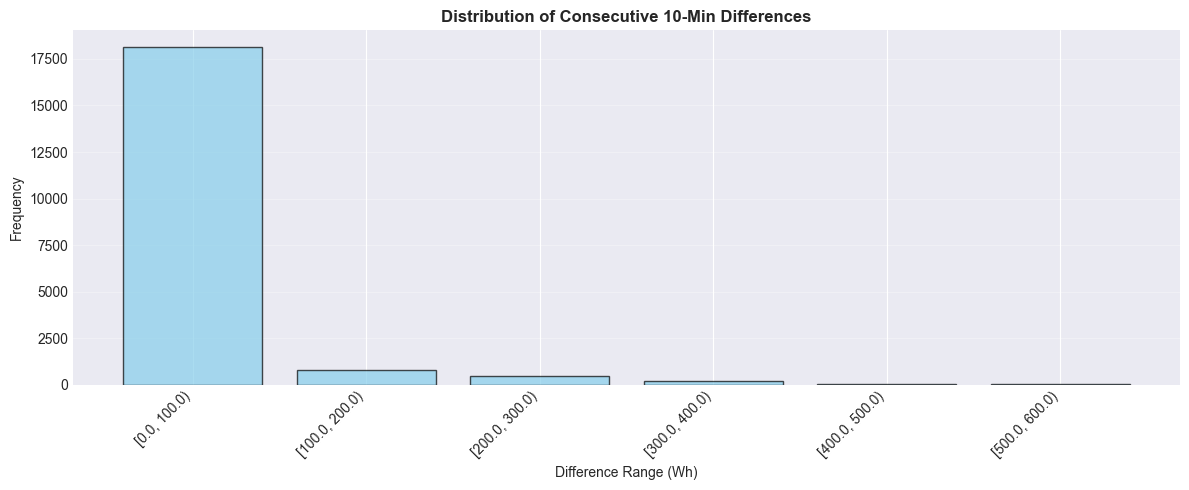


💡 Key Insight: Median difference: 10.00 Wh, Max: 690.00 Wh


In [13]:

print("\n" + "=" * 80)
print("SECTION 10: CONSECUTIVE DIFFERENCES ANALYSIS")
print("=" * 80)

df['Appliance_Diff'] = df['Appliances'].diff().abs()
diffs = df['Appliance_Diff'].dropna()

max_diff = diffs.max()
bins = np.arange(0, max_diff + 10, 100)

diff_counts = pd.cut(diffs, bins=bins, right=False).value_counts().sort_index()
diff_distribution = diff_counts.reset_index()
diff_distribution.columns = ['Diff_Range', 'Count']
diff_distribution['Percentage'] = (diff_distribution['Count'] / len(diffs) * 100).round(2)

print("\n📊 Distribution of Consecutive Differences:")
print(diff_distribution.head(15))

# Visualization
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(range(len(diff_distribution.head(15))), 
              diff_distribution.head(15)['Count'], 
              color='skyblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Difference Range (Wh)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Consecutive 10-Min Differences', fontsize=12, fontweight='bold')
ax.set_xticks(range(len(diff_distribution.head(15))))
ax.set_xticklabels(diff_distribution.head(15)['Diff_Range'].astype(str), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 Key Insight: Median difference: {diffs.median():.2f} Wh, Max: {diffs.max():.2f} Wh")


## LARGE JUMPS (400-600 Wh DIFFERENCE)

In [14]:

print("\n" + "=" * 80)
print("SECTION 11: LARGE JUMPS (400–600 Wh DIFFERENCE)")
print("=" * 80)

mask = (df['Appliance_Diff'] >= 400) & (df['Appliance_Diff'] <= 600)
indices = df.index[mask]

rows_to_show = []

for idx in indices[:10]:  # Show first 10 large jumps
    pos = df.index.get_loc(idx)
    start = max(pos-1, 0)
    end = min(pos+2, len(df))
    rows_to_show.append(df.iloc[start:end][['Appliances', 'Appliance_Diff']])

result = pd.concat(rows_to_show).drop_duplicates()

print(f"\n⚡ Found {len(indices)} instances of large jumps (400–600 Wh)")
print("\nSample of transitions (first 10 occurrences):")
print(result.head(15))



SECTION 11: LARGE JUMPS (400–600 Wh DIFFERENCE)

⚡ Found 94 instances of large jumps (400–600 Wh)

Sample of transitions (first 10 occurrences):
                     Appliances  Appliance_Diff
date                                           
2016-01-12 10:20:00         450            50.0
2016-01-12 10:30:00          50           400.0
2016-01-12 10:40:00          60            10.0
2016-01-14 18:50:00         790           690.0
2016-01-14 19:00:00         380           410.0
2016-01-14 19:10:00         360            20.0
2016-01-16 18:40:00         560           290.0
2016-01-16 18:50:00        1080           520.0
2016-01-16 19:00:00         750           330.0
2016-01-17 17:20:00         380           250.0
2016-01-17 17:30:00         800           420.0
2016-01-17 17:40:00         790            10.0
2016-01-17 17:50:00         540           250.0
2016-01-17 18:00:00         120           420.0
2016-01-17 18:10:00         110            10.0


## TEMPORAL PATTERNS OF LARGE JUMPS


SECTION 12: TEMPORAL PATTERNS OF LARGE JUMPS

⏰ Large Jumps by Hour:
    Hour  Count
0      6      1
1      7      3
2      8      3
3      9      4
4     10      8
5     11     11
6     12      4
7     13      5
8     14      7
9     15      3
10    16      2
11    17      8
12    18     20
13    19     13
14    20      1
15    21      1


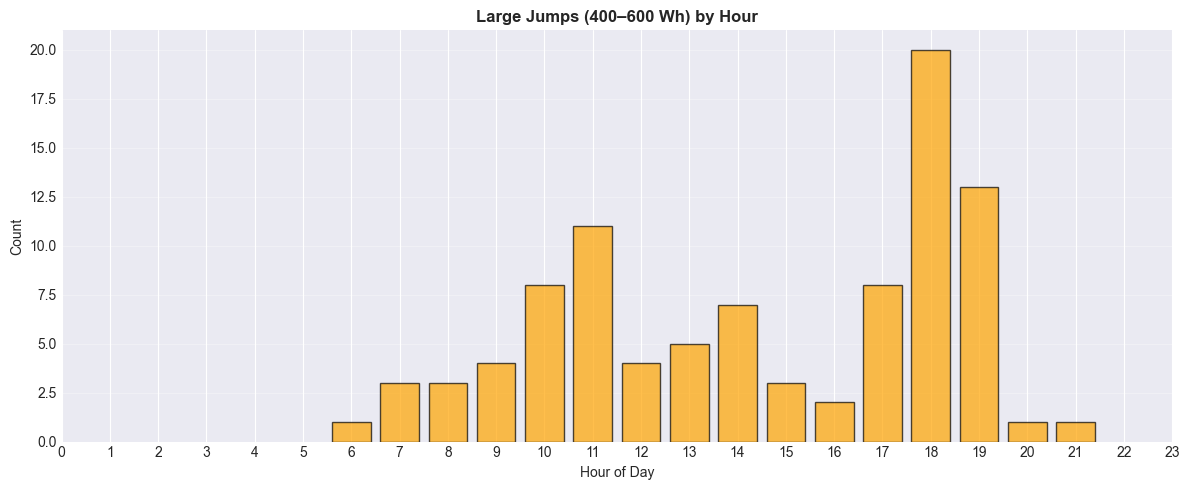

In [15]:

print("\n" + "=" * 80)
print("SECTION 12: TEMPORAL PATTERNS OF LARGE JUMPS")
print("=" * 80)

# Large jumps by hour
df_jumps = df[mask].copy()
df_jumps['Hour'] = df_jumps.index.hour

hour_jumps = (
    df_jumps['Hour']
    .value_counts()
    .sort_index()
    .reset_index()
)
hour_jumps.columns = ['Hour', 'Count']

print("\n⏰ Large Jumps by Hour:")
print(hour_jumps)

# Visualization
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(hour_jumps['Hour'], hour_jumps['Count'], 
              color='orange', edgecolor='black', alpha=0.7)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Count')
ax.set_title('Large Jumps (400–600 Wh) by Hour', fontsize=12, fontweight='bold')
ax.set_xticks(range(0, 24))
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## SPIKE DURATION & CONSTANCY

In [16]:

print("\n" + "=" * 80)
print("SECTION 13: SPIKE DURATION & VALUE CONSTANCY")
print("=" * 80)

df['change_flag'] = df['Appliances'].ne(df['Appliances'].shift())
df['run_id'] = df['change_flag'].cumsum()

run_lengths = (
    df
    .groupby('run_id')
    .size()
    .reset_index(name='run_length')
)

distribution = (
    run_lengths
    .groupby('run_length')
    .size()
    .reset_index(name='Count')
)

distribution['Percentage'] = (distribution['Count'] / distribution['Count'].sum() * 100).round(2)

print("\n📊 Distribution of Constant-Value Run Lengths (10-min intervals):")
print(distribution.head(20))

# Interpretation
print("\n💡 Interpretation:")
print("   - Most runs are 1–2 intervals (10–20 mins of constant value)")
print("   - Longer runs (>5 intervals) are less common")
print("   - This indicates frequent oscillations in appliance usage")



SECTION 13: SPIKE DURATION & VALUE CONSTANCY

📊 Distribution of Constant-Value Run Lengths (10-min intervals):
    run_length  Count  Percentage
0            1  10545       75.42
1            2   2110       15.09
2            3    737        5.27
3            4    337        2.41
4            5    148        1.06
5            6     72        0.51
6            7     23        0.16
7            8      6        0.04
8            9      1        0.01
9           10      1        0.01
10          11      1        0.01

💡 Interpretation:
   - Most runs are 1–2 intervals (10–20 mins of constant value)
   - Longer runs (>5 intervals) are less common
   - This indicates frequent oscillations in appliance usage


## HOUR-RANGE-WISE DIFFERENCE ANALYSIS

In [17]:
print("\n" + "=" * 80)
print("SECTION 14: HOUR-WISE DIFFERENCE PATTERNS")
print("=" * 80)

df['Hour'] = df.index.hour
df['Hour_4bin'] = (df['Hour'] // 4) * 4
df['Hour_4bin_label'] = df['Hour_4bin'].astype(str) + '-' + (df['Hour_4bin'] + 4).astype(str)

df['Appliances_diff'] = df['Appliances'].diff().abs()

bins = [0, 50, 100, 200, 300, 400, 600, 1000, np.inf]
labels = ['0–50', '50–100', '100–200', '200–300',
          '300–400', '400–600', '600–1000', '1000+']

df['Diff_Range'] = pd.cut(df['Appliances_diff'], bins=bins, labels=labels, right=False)

count_df = (
    df
    .groupby(['Hour_4bin_label', 'Diff_Range'])
    .size()
    .reset_index(name='Count')
)

total_per_hour = count_df.groupby('Hour_4bin_label')['Count'].transform('sum')
count_df['Proportion'] = (count_df['Count'] / total_per_hour).round(3)

hour_order = [f'{i}-{i+4}' for i in range(0, 24, 4)]
count_df['Hour_4bin_label'] = pd.Categorical(
    count_df['Hour_4bin_label'],
    categories=hour_order,
    ordered=True
)

count_df = count_df.sort_values(['Hour_4bin_label', 'Diff_Range'])

print("\n📊 Difference Magnitude by Hour Range:")
print(count_df.head(20))


SECTION 14: HOUR-WISE DIFFERENCE PATTERNS

📊 Difference Magnitude by Hour Range:
   Hour_4bin_label Diff_Range  Count  Proportion
0              0-4       0–50   3280       0.998
1              0-4     50–100      4       0.001
2              0-4    100–200      1       0.000
3              0-4    200–300      3       0.001
4              0-4    300–400      0       0.000
5              0-4    400–600      0       0.000
6              0-4   600–1000      0       0.000
7              0-4      1000+      0       0.000
32             4-8       0–50   3146       0.957
33             4-8     50–100     51       0.016
34             4-8    100–200     38       0.012
35             4-8    200–300     37       0.011
36             4-8    300–400     12       0.004
37             4-8    400–600      2       0.001
38             4-8   600–1000      2       0.001
39             4-8      1000+      0       0.000
40            8-12       0–50   2537       0.772
41            8-12     50–100    257

## DAY-WISE DIFFERENCE PATTERNS


SECTION 15: DAY-WISE DIFFERENCE PATTERNS

📊 Difference Magnitude by Day of Week:
          Day Diff_Range  Count  Proportion
8      Monday       0–50   2355       0.848
9      Monday     50–100    139       0.050
10     Monday    100–200    129       0.046
11     Monday    200–300    100       0.036
12     Monday    300–400     32       0.012
13     Monday    400–600     20       0.007
14     Monday   600–1000      2       0.001
15     Monday      1000+      0       0.000
40    Tuesday       0–50   2567       0.891
41    Tuesday     50–100    109       0.038
42    Tuesday    100–200    100       0.035
43    Tuesday    200–300     56       0.019
44    Tuesday    300–400     34       0.012
45    Tuesday    400–600     11       0.004
46    Tuesday   600–1000      3       0.001
47    Tuesday      1000+      0       0.000
48  Wednesday       0–50   2557       0.888
49  Wednesday     50–100    132       0.046
50  Wednesday    100–200    100       0.035
51  Wednesday    200–300     60       

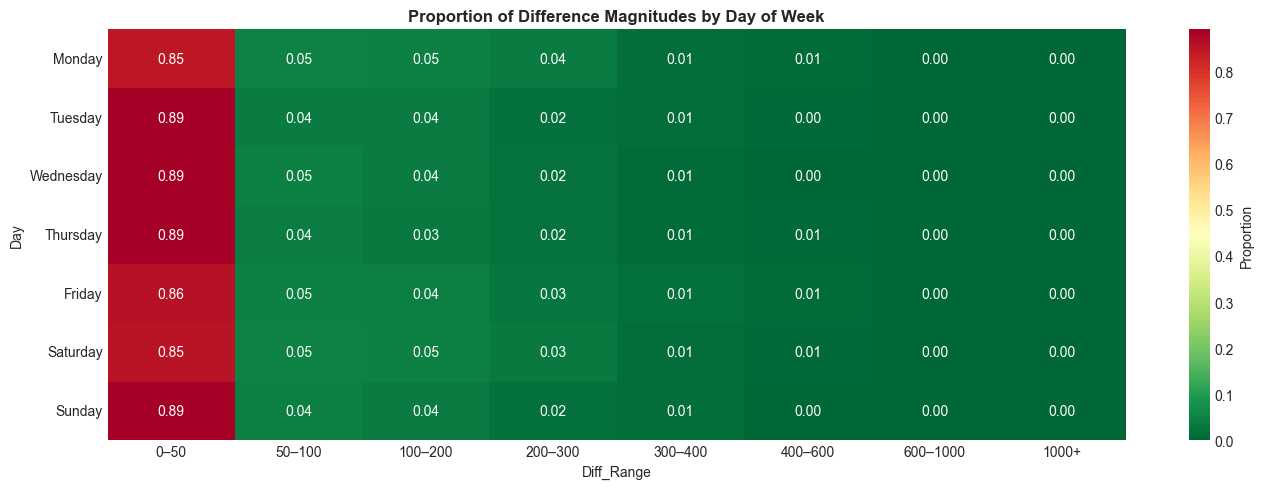

In [18]:

print("\n" + "=" * 80)
print("SECTION 15: DAY-WISE DIFFERENCE PATTERNS")
print("=" * 80)

df['Day'] = df.index.day_name()
df['Appliances_diff'] = df['Appliances'].diff().abs()

target_df = df.dropna(subset=['Appliances_diff']).copy()

bins = [0, 50, 100, 200, 300, 400, 600, 1000, np.inf]
labels = ['0–50', '50–100', '100–200', '200–300',
          '300–400', '400–600', '600–1000', '1000+']

target_df['Diff_Range'] = pd.cut(target_df['Appliances_diff'], bins=bins, labels=labels, right=False)

count_df_day = (
    target_df
    .groupby(['Day', 'Diff_Range'])
    .size()
    .reset_index(name='Count')
)

total_per_day = count_df_day.groupby('Day')['Count'].transform('sum')
count_df_day['Proportion'] = (count_df_day['Count'] / total_per_day).round(3)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_df_day['Day'] = pd.Categorical(count_df_day['Day'], categories=day_order, ordered=True)

count_df_day = count_df_day.sort_values(['Day', 'Diff_Range'])

print("\n📊 Difference Magnitude by Day of Week:")
print(count_df_day)

# Heatmap
heatmap_day = count_df_day.pivot(index='Day', columns='Diff_Range', values='Proportion').fillna(0)
fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(heatmap_day, cmap='RdYlGn_r', ax=ax, annot=True, fmt='.2f', cbar_kws={'label': 'Proportion'})
ax.set_title('Proportion of Difference Magnitudes by Day of Week', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

## MOST FREQUENT VALUES BY HOUR


SECTION 16: MOST FREQUENT APPLIANCE VALUES BY HOUR

📊 Most Frequent Appliance Value by Hour:
    Hour  Most_Frequent_Value
0      0                   50
1      1                   50
2      2                   50
3      3                   50
4      4                   50
5      5                   50
6      6                   50
7      7                   50
8      8                   50
9      9                   50
10    10                   60
11    11                   50
12    12                   50
13    13                   50
14    14                   60
15    15                   50
16    16                   50
17    17                   90
18    18                  100
19    19                  110
20    20                  100
21    21                   80
22    22                   60
23    23                   60


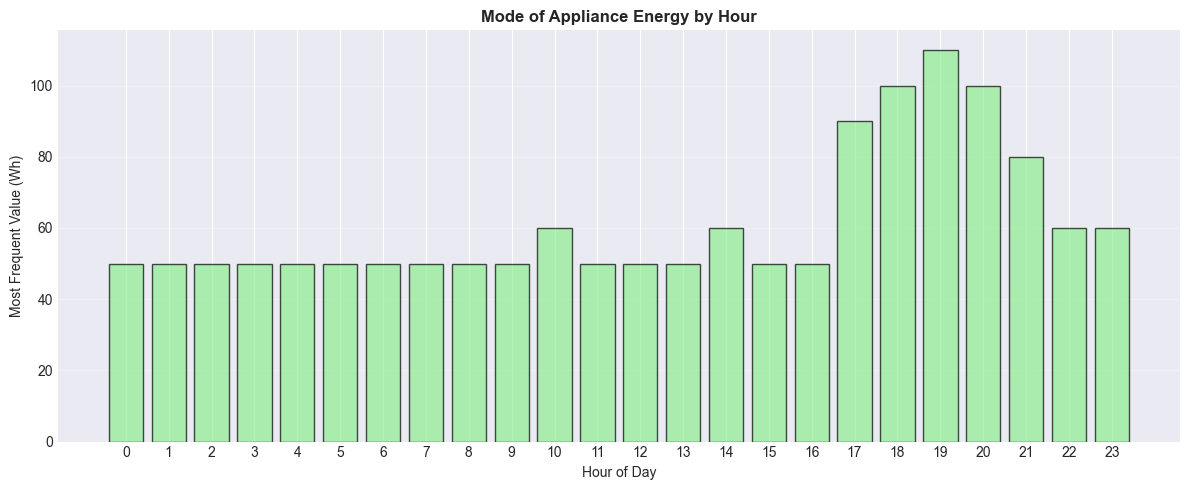

In [19]:

print("\n" + "=" * 80)
print("SECTION 16: MOST FREQUENT APPLIANCE VALUES BY HOUR")
print("=" * 80)

df['Hour'] = df.index.hour

hourwise_mode = (
    df.groupby('Hour')['Appliances']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index(name='Most_Frequent_Value')
)

print("\n📊 Most Frequent Appliance Value by Hour:")
print(hourwise_mode)

# Visualization
fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(hourwise_mode['Hour'], hourwise_mode['Most_Frequent_Value'], 
              color='lightgreen', edgecolor='black', alpha=0.7)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Most Frequent Value (Wh)')
ax.set_title('Mode of Appliance Energy by Hour', fontsize=12, fontweight='bold')
ax.set_xticks(range(0, 24))
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## VARIANCE EXPLAINED BY FEATURES


SECTION 17: FEATURE IMPORTANCE (VARIANCE EXPLAINED)

📊 Variance Explained (R²) by Feature:
           Variable  Variance_Explained  Variance_Explained_%
0   Appliances_diff            0.447485                 44.75
1    Appliance_Diff            0.447485                 44.75
2         Hour_4bin            0.048761                  4.88
3              Hour            0.046999                  4.70
4            RH_out            0.023190                  2.32
5                T2            0.014418                  1.44
6                T6            0.013839                  1.38
7             T_out            0.009832                  0.98
8              RH_8            0.008843                  0.88
9         Windspeed            0.007590                  0.76
10             RH_1            0.007401                  0.74
11               T3            0.007235                  0.72
12             RH_6            0.006919                  0.69
13             RH_2            0.003656 

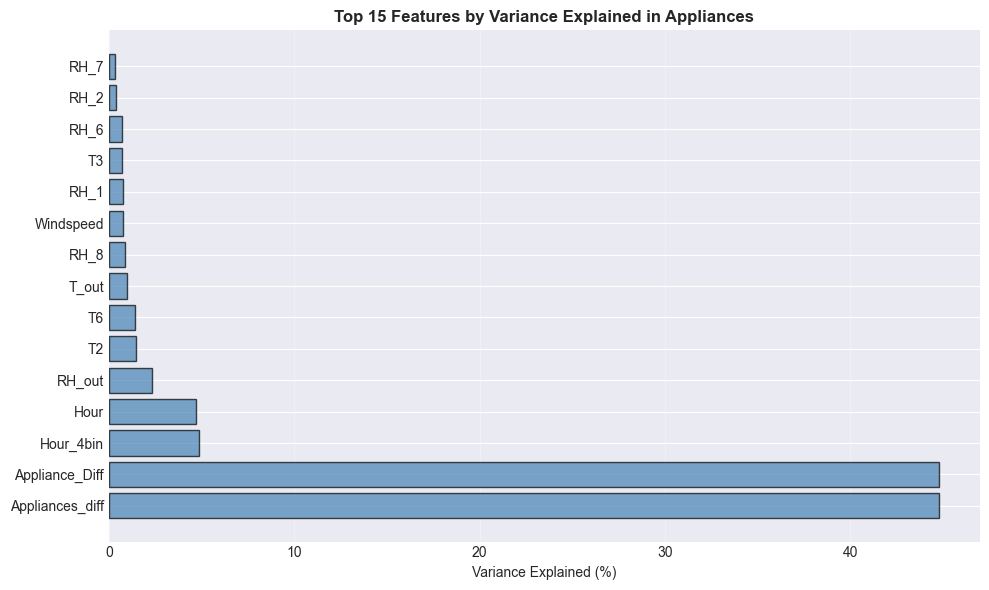

In [20]:

print("\n" + "=" * 80)
print("SECTION 17: FEATURE IMPORTANCE (VARIANCE EXPLAINED)")
print("=" * 80)

numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()['Appliances']

variance_explained_df = (
    (corr ** 2)
    .drop(labels=['Appliances', 'lights', 'change_flag', 'run_id'], errors='ignore')
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'index': 'Variable', 'Appliances': 'Variance_Explained'})
)

variance_explained_df['Variance_Explained_%'] = (
    variance_explained_df['Variance_Explained'] * 100
).round(2)

print("\n📊 Variance Explained (R²) by Feature:")
print(variance_explained_df.head(15))

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(variance_explained_df.head(15)['Variable'], 
        variance_explained_df.head(15)['Variance_Explained_%'],
        color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Variance Explained (%)')
ax.set_title('Top 15 Features by Variance Explained in Appliances', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


## SEQUENTIAL PATTERNS

In [21]:

print("\n" + "=" * 80)
print("SECTION 18: SEQUENTIAL PATTERNS IN HIGH-VALUE EVENTS")
print("=" * 80)

# Buckets
target_bucket = (600, 1050)
prev_buckets = [(300, 450), (450, 600)]

# Count preceding patterns
count_with_prev = {f'{b[0]}-{b[1]}': 0 for b in prev_buckets}
count_no_prev = 0
total_target = 0

for date, group in df.groupby(df.index.date):
    target_rows = group[(group['Appliances'] >= target_bucket[0]) & (group['Appliances'] <= target_bucket[1])]
    total_target += len(target_rows)
    
    for idx in target_rows.index:
        prev_rows = group.loc[:idx].iloc[:-1]
        
        found = False
        for b in prev_buckets:
            if ((prev_rows['Appliances'] >= b[0]) & (prev_rows['Appliances'] <= b[1])).any():
                count_with_prev[f'{b[0]}-{b[1]}'] += 1
                found = True
        if not found:
            count_no_prev += 1

distribution_seq = pd.DataFrame({
    'Preceding_State': list(count_with_prev.keys()) + ['No preceding state'],
    'Count': list(count_with_prev.values()) + [count_no_prev]
})

distribution_seq['Proportion'] = (distribution_seq['Count'] / total_target).round(3)

print(f"\n🔗 Sequential Patterns Leading to High-Value Events (600–1050 Wh):")
print(f"   Total high-value events: {total_target}")
print(distribution_seq)


SECTION 18: SEQUENTIAL PATTERNS IN HIGH-VALUE EVENTS

🔗 Sequential Patterns Leading to High-Value Events (600–1050 Wh):
   Total high-value events: 168
      Preceding_State  Count  Proportion
0             300-450    157       0.935
1             450-600    120       0.714
2  No preceding state      6       0.036


## LAG-BASED ANALYSIS


In [23]:
import pandas as pd
import numpy as np

print("\n" + "=" * 80)
print("SECTION 19: LAG-BASED ANALYSIS (HOURS BEFORE HIGH-VALUE EVENT)")
print("=" * 80)

# ---------------------------------------------------
# Configuration
# ---------------------------------------------------
target_bucket = (600, 1050)              # High-value event range
prev_buckets = [(300, 450), (450, 600)]  # Preceding buckets

# ---------------------------------------------------
# Initialize counters
# ---------------------------------------------------
lag_counts = {f'{b[0]}-{b[1]}': {} for b in prev_buckets}
no_prev_count = 0
total_target = 0

# ---------------------------------------------------
# Ensure datetime index and sorted data
# ---------------------------------------------------
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# ---------------------------------------------------
# Main lag analysis
# ---------------------------------------------------
for date, group in df.groupby(df.index.date):

    target_rows = group[
        (group['Appliances'] >= target_bucket[0]) &
        (group['Appliances'] <= target_bucket[1])
    ]

    total_target += len(target_rows)

    for idx in target_rows.index:
        current_time = idx
        prev_rows = group.loc[:idx].iloc[:-1]

        found_any = False

        for b in prev_buckets:
            bucket_label = f'{b[0]}-{b[1]}'
            bucket_rows = prev_rows[
                (prev_rows['Appliances'] >= b[0]) &
                (prev_rows['Appliances'] <= b[1])
            ]

            if not bucket_rows.empty:
                found_any = True

                time_diffs = (
                    current_time - bucket_rows.index
                ).total_seconds() / 3600

                closest_lag = np.min(time_diffs)
                lag_bin = int(np.ceil(closest_lag))

                lag_counts[bucket_label][lag_bin] = (
                    lag_counts[bucket_label].get(lag_bin, 0) + 1
                )

        if not found_any:
            no_prev_count += 1

# ---------------------------------------------------
# Build results DataFrame
# ---------------------------------------------------
rows_lag = []

for bucket, lags in lag_counts.items():
    for lag, count in lags.items():
        rows_lag.append({
            'Preceding_Bucket': bucket,
            'Lag_Hours': lag,
            'Count': count
        })

rows_lag.append({
    'Preceding_Bucket': 'No preceding event',
    'Lag_Hours': None,
    'Count': no_prev_count
})

lag_distribution_df = pd.DataFrame(rows_lag)

# ---------------------------------------------------
# Sort and clean output
# ---------------------------------------------------
lag_distribution_df['Lag_Hours_sort'] = lag_distribution_df['Lag_Hours'].fillna(9999)
lag_distribution_df.sort_values(
    ['Preceding_Bucket', 'Lag_Hours_sort'],
    inplace=True
)
lag_distribution_df.drop(columns='Lag_Hours_sort', inplace=True)
lag_distribution_df.reset_index(drop=True, inplace=True)

# ---------------------------------------------------
# Output
# ---------------------------------------------------
print(f"\n⏱️  Lag Distribution Before High-Value Events:")
print(lag_distribution_df)

print(f"\nTotal high-value events analyzed: {total_target}")



SECTION 19: LAG-BASED ANALYSIS (HOURS BEFORE HIGH-VALUE EVENT)

⏱️  Lag Distribution Before High-Value Events:
      Preceding_Bucket  Lag_Hours  Count
0              300-450        1.0     90
1              300-450        2.0     49
2              300-450        3.0      8
3              300-450        4.0      2
4              300-450        6.0      2
5              300-450        7.0      3
6              300-450        8.0      1
7              300-450       11.0      1
8              300-450       13.0      1
9              450-600        1.0     66
10             450-600        2.0     28
11             450-600        3.0      8
12             450-600        4.0      3
13             450-600        5.0      4
14             450-600        6.0      6
15             450-600        7.0      4
16             450-600        8.0      1
17  No preceding event        NaN      6

Total high-value events analyzed: 168


## DAY-HOUR GRANULAR ANALYSIS

In [24]:

print("\n" + "=" * 80)
print("SECTION 20: DAY-HOUR-DIFFERENCE GRANULAR ANALYSIS")
print("=" * 80)

df['Day'] = df.index.day_name()
df['Hour'] = df.index.hour
df['Hour_4bin'] = (df['Hour'] // 4) * 4
df['Hour_4bin_label'] = df['Hour_4bin'].astype(str) + '-' + (df['Hour_4bin'] + 4).astype(str)

df['Appliances_diff'] = df['Appliances'].diff().abs()
df = df.dropna(subset=['Appliances_diff'])

bins = [0, 10, 25, 50, 100, 200, 400, 800, np.inf]
labels = ['0–10', '10–25', '25–50', '50–100',
          '100–200', '200–400', '400–800', '800+']

df['Diff_Range'] = pd.cut(df['Appliances_diff'], bins=bins, labels=labels, right=False)

count_df_granular = (
    df
    .groupby(['Day', 'Hour_4bin_label', 'Diff_Range'])
    .size()
    .reset_index(name='Count')
)

total_granular = count_df_granular.groupby(['Day', 'Hour_4bin_label'])['Count'].transform('sum')
count_df_granular['Proportion'] = (count_df_granular['Count'] / total_granular).round(3)

day_order = ['Monday', 'Tuesday', 'Wednesday',
             'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_order = [f'{i}-{i+4}' for i in range(0, 24, 4)]

count_df_granular['Day'] = pd.Categorical(count_df_granular['Day'], categories=day_order, ordered=True)
count_df_granular['Hour_4bin_label'] = pd.Categorical(
    count_df_granular['Hour_4bin_label'],
    categories=hour_order,
    ordered=True
)

count_df_granular = count_df_granular.sort_values(['Day', 'Hour_4bin_label', 'Diff_Range'])

print("\n📊 Difference Magnitude Distribution: Day × Hour Range (sample):")
print(count_df_granular.head(20))



SECTION 20: DAY-HOUR-DIFFERENCE GRANULAR ANALYSIS

📊 Difference Magnitude Distribution: Day × Hour Range (sample):
       Day Hour_4bin_label Diff_Range  Count  Proportion
48  Monday             0-4       0–10    171       0.375
49  Monday             0-4      10–25    277       0.607
50  Monday             0-4      25–50      8       0.018
51  Monday             0-4     50–100      0       0.000
52  Monday             0-4    100–200      0       0.000
53  Monday             0-4    200–400      0       0.000
54  Monday             0-4    400–800      0       0.000
55  Monday             0-4       800+      0       0.000
80  Monday             4-8       0–10    125       0.274
81  Monday             4-8      10–25    276       0.605
82  Monday             4-8      25–50     38       0.083
83  Monday             4-8     50–100      8       0.018
84  Monday             4-8    100–200      4       0.009
85  Monday             4-8    200–400      5       0.011
86  Monday             4-8   